<a href="https://colab.research.google.com/github/abduhsalam/Bank-Marketing-Classification/blob/master/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Bank Marketing Classification**

Abduh Salam DS 0101

Attribute Information:
About client features:

- age

- job (type of job)

- marital (marital status)

- education

- default (has credit in default? 'no','yes','unknown')

- balance

- housing (has housing loan?'no','yes','unknown')

- loan (has personal loan?'no','yes','unknown')

About current campaign:
- contact (communication type: 'cellular','telephone')

- duration (last contact duration, in seconds) Important note: the duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- day (last contact day of the week)

- month (last contact month of year)

- campaign (number of contacts performed during this campaign and for this client)

- deposit (has the client subscribed a term deposit?'yes','no')

About previous contacts/campaign:

- pdays (number of days that passed by after the client was last contacted from a previous campaign, 999 means client was not previously contacted)

- previous (number of contacts performed before this campaign and for this client)

- poutcome (outcome of the previous marketing campaign: 'failure','nonexistent','success')

Import Raw Dataset & Import Libraries

**Read data**

In [5]:
# Import Library
import pandas as pd

# Import Data to Google Colab
df_bank = pd.read_csv('https://raw.githubusercontent.com/abduhsalam/Bank-Marketing-Classification/master/bank.csv', sep = ',')
df_bank

# Show 10 first Row
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
# Prints the Dataset Information
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
# Prints Descriptive Statistics
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


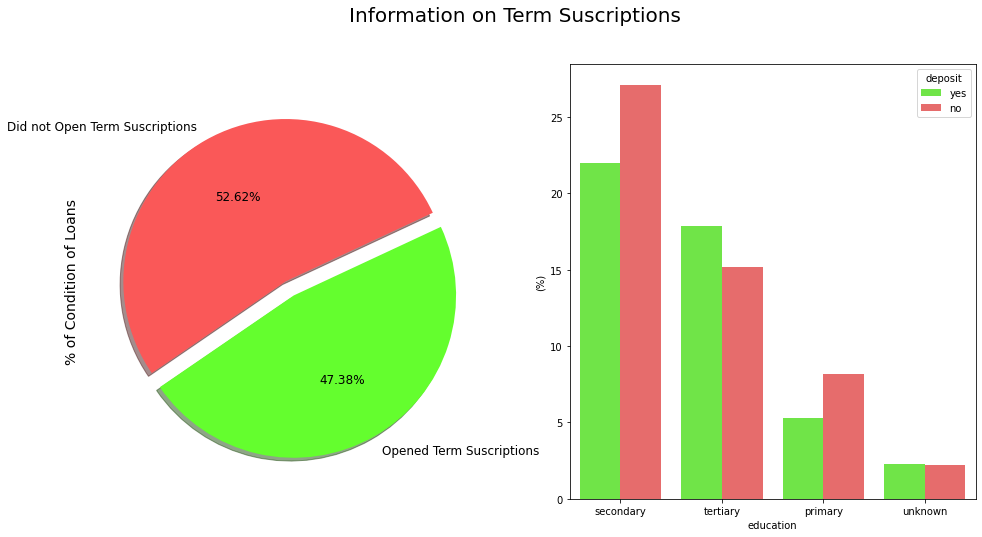

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
palette = ["#64FE2E", "#FA5858"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df_bank["deposit"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.barplot(x="education", y="balance", hue="deposit", data=df_bank, palette=palette, estimator=lambda x: len(x) / len(df_bank) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df_bank["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

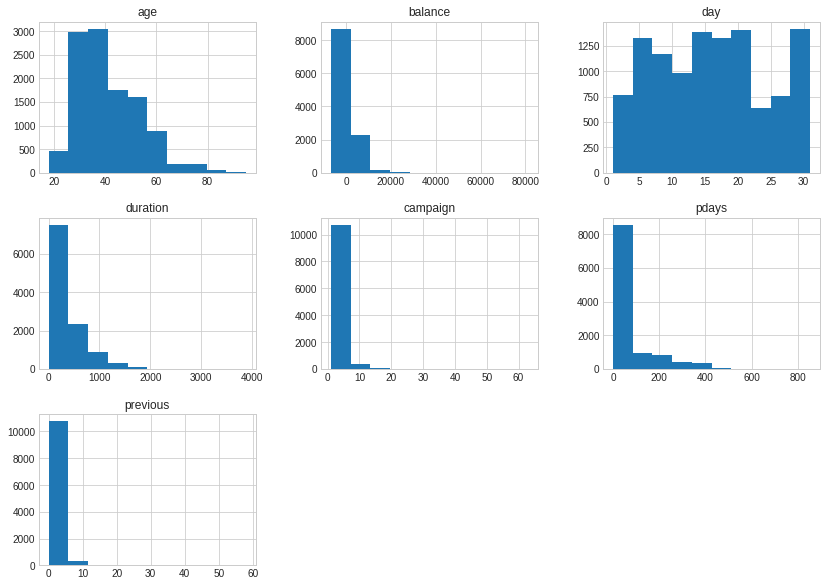

In [9]:
plt.style.use('seaborn-whitegrid')

df_bank.hist(figsize=(14,10))
plt.show()

Data Preprocessing

Handling Missing Values

In [10]:
# Check for Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No Missing Value



Encode Categorical Data

In [11]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[features]))
df_encoded.columns = encoder.get_feature_names(features)

# Replace Categotical Data with Encoded Data
df_bank.drop(features ,axis=1, inplace=True)
df_encoded= pd.concat([df_bank, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Set Feature and Target

In [12]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# Select Target
target = df_encoded['deposit']
target

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

Set Training and Testing Data

In [14]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 51)
(3349, 51)
(7813,)
(3349,)


In [15]:
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,554,5,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,514,20,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,277,14,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4337,39,91,3,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2438,40,0,6,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# SVM
Modeling SVM, using cross validation to increase algorithm performance

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# pipeline combining transformers and estimator
svm = make_pipeline(StandardScaler(), SVC(random_state=1, probability=True))

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1]
pg_svm = [{'svc__C':r, 'svc__kernel':['linear']}]

gs_svm = GridSearchCV(estimator= svm,                    
                    param_grid= pg_svm,
                    scoring='accuracy',
                    cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_svm.fit(X_train, y_train)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

y_pred_svm = gs_svm_best.predict(X_test)

Model Evaluation

In [17]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[1481,  279],
       [ 300, 1289]])

In [18]:
acc_svm = metrics.accuracy_score(y_test, y_pred_svm)
prec_svm = metrics.precision_score(y_test, y_pred_svm, pos_label='yes')
rec_svm = metrics.recall_score(y_test, y_pred_svm, pos_label='yes')
f1_svm = metrics.f1_score(y_test, y_pred_svm, pos_label='yes')
kappa_svm = metrics.cohen_kappa_score(y_test, y_pred_svm)

print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)
print("Cohens Kappa Score:", kappa_svm)

Accuracy: 0.8271125709166915
Precision: 0.8220663265306123
Recall: 0.8112020138451856
F1 Score: 0.8165980361102313
Cohens Kappa Score: 0.6530985892059469


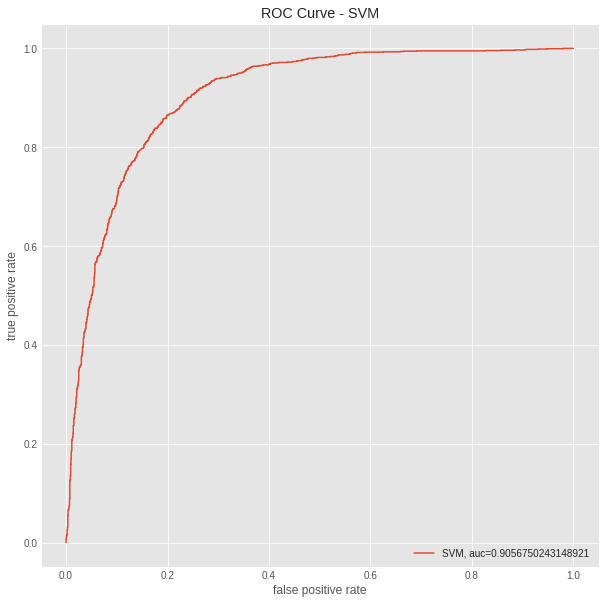

In [32]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_svm_proba = gs_svm_best.predict_proba(X_test)[::,1]
fprsvm, tprsvm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba, pos_label="yes")
aucsvm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
plt.plot(fprsvm,tprsvm,label="SVM, auc="+str(aucsvm))
plt.title('ROC Curve - SVM')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Random Forest***

A Random Forest is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a Random Forest is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

Modeling Random Forest, using cross validation to increase algorithm performance

In [20]:
# Import Module
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Modeling Random Forest
rf = RandomForestClassifier(random_state=1)
pg_rf = {'n_estimators': [100,200,400],'max_depth': [20,40,50]}
gs_rf = GridSearchCV(estimator= rf,
                  param_grid= pg_rf,
                  scoring='accuracy',
                  cv=2)

gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)
gs_rf_best = gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

# Predict to Test Data 
y_pred_rf = gs_rf_best.predict(X_test)

Model Evaluation

In [21]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[1438,  322],
       [ 189, 1400]])

In [22]:
# Show the Accuracy, Precision, Recall
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
prec_rf = metrics.precision_score(y_test, y_pred_rf, pos_label='yes')
rec_rf = metrics.recall_score(y_test, y_pred_rf, pos_label='yes')
f1_rf = metrics.f1_score(y_test, y_pred_rf, pos_label='yes')
kappa_rf = metrics.cohen_kappa_score(y_test, y_pred_rf)

print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("Cohens Kappa Score:", kappa_rf)

Accuracy: 0.8474171394446103
Precision: 0.8130081300813008
Recall: 0.8810572687224669
F1 Score: 0.8456659619450316
Cohens Kappa Score: 0.6952756425677031


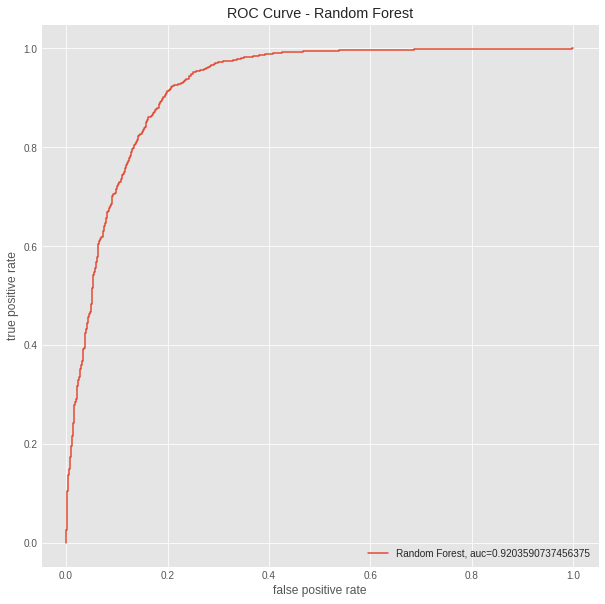

In [23]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_rf_proba = gs_rf_best.predict_proba(X_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba, pos_label="yes")
aucrf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***K Nearest Neighbor***

Modeling K Nearest Neighbor, use cross validation to increase algorithm performance.

In [24]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Modeling KNN Classifier
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
gs_knn=GridSearchCV(estimator= pipe_knn,
                    param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7,8]},
                    scoring='accuracy',
                    cv=10)
gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)
gs_knn.fit(X_train, y_train)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

# Predict to Test Data
y_pred_knn = gs_knn_best.predict(X_test)

Model Evaluation

In [25]:
# Show the Confussion Matrix
from sklearn import metrics

cm_gs_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_gs_knn

array([[1446,  314],
       [ 522, 1067]])

In [26]:
# Show the Accuracy, Precision, Recall
acc_gs_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_gs_knn = metrics.precision_score(y_test, y_pred_knn, pos_label='yes')
rec_gs_knn = metrics.recall_score(y_test, y_pred_knn, pos_label='yes')
f1_gs_knn = metrics.f1_score(y_test, y_pred_knn, pos_label='yes')
kappa_gs_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_gs_knn)
print("Precision:", prec_gs_knn)
print("Recall:", rec_gs_knn)
print("F1 Score:", f1_gs_knn)
print("Cohens Kappa Score:", kappa_gs_knn)

Accuracy: 0.7503732457449985
Precision: 0.7726285300506879
Recall: 0.6714915040906231
F1 Score: 0.7185185185185184
Cohens Kappa Score: 0.4962380202500598


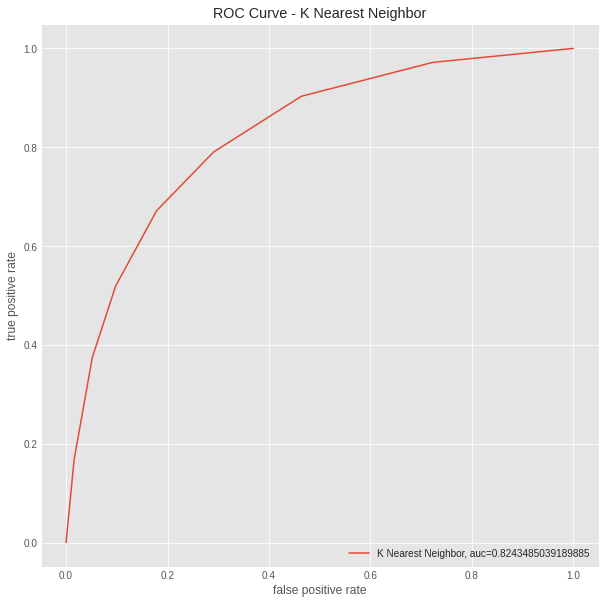

In [27]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# ROC Curve
y_pred_knn_proba = gs_knn_best.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba, pos_label="yes")
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K Nearest Neighbor, auc="+str(aucknn))
plt.title('ROC Curve - K Nearest Neighbor')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Model Comparison***

In [28]:
# Comparing Model Performance
print("SVM Accuracy =",acc_svm)
print("SVM Precision =",prec_svm)
print("SVM Recall =",rec_svm)
print("SVM F1-Score =", f1_svm)
print("_______________________")
print("Random Forest Accuracy =",acc_rf)
print("Random Forest Precision =",prec_rf)
print("Random Forest Recall =",rec_rf)
print("Random Forest F1-Score =", f1_rf)
print("_______________________")
print("K Nearest Neighbor Accuracy =", acc_gs_knn)
print("K Nearest Neighbor Precision =", prec_gs_knn)
print("K Nearest Neighbor Recall =", rec_gs_knn)
print("K Nearest Neighbor F1-Score =", f1_gs_knn)

SVM Accuracy = 0.8271125709166915
SVM Precision = 0.8220663265306123
SVM Recall = 0.8112020138451856
SVM F1-Score = 0.8165980361102313
_______________________
Random Forest Accuracy = 0.8474171394446103
Random Forest Precision = 0.8130081300813008
Random Forest Recall = 0.8810572687224669
Random Forest F1-Score = 0.8456659619450316
_______________________
K Nearest Neighbor Accuracy = 0.7503732457449985
K Nearest Neighbor Precision = 0.7726285300506879
K Nearest Neighbor Recall = 0.6714915040906231
K Nearest Neighbor F1-Score = 0.7185185185185184


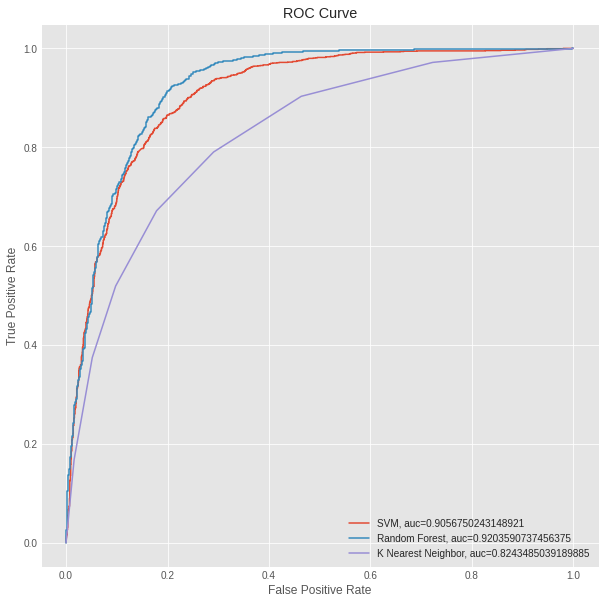

In [29]:
# Comparing ROC Curve
plt.plot(fprsvm,tprsvm,label="SVM, auc="+str(aucsvm))
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.plot(fprknn,tprknn,label="K Nearest Neighbor, auc="+str(aucknn))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['SVM'] = y_pred_svm
df_compare['Random Forest'] = y_pred_rf
df_compare['KNN'] = y_pred_knn

In [31]:
df_compare.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,SVM,Random Forest,KNN
8422,31,554,5,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,no,no
9226,43,514,20,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,no,no
8162,26,277,14,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,no,no
4337,39,91,3,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,yes,yes,yes,yes
2438,40,0,6,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes,yes,yes,yes


# **Summary**

dilihat dari nilai akurasi, recall, precision dan f1 random forest lebih baik dari SVM dan KNN.

Berdasarkan ROC curve dapat disimpulkan bahwa random forest lebih baik daripada SVM, kNN.
Secara berurutan Random Forest, SVM dan KNN.